In [18]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [21]:
df = pd.read_csv("../input/TwitterSentimentAnalysis.csv")

In [22]:
df.shape

(31962, 3)

In [23]:
df.head()

,id,label,tweet_text
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [24]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [25]:
df.iloc[0:2,2]

0                         @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
1    @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Name: tweet_text, dtype: object

In [28]:
df.rename(columns={'tweet_text':'tweet'},inplace=True)

In [ ]:
##  Basic feature extraction using text data 
# Number of words
# Number of characters
# Average word length
# Number of stopwords
# Number of special characters
# Number of numerics
# Number of uppercase words

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [30]:
# Number of words
df['Word_Count']=df['tweet'].apply(lambda x:len(str(x).split(" ")))

In [31]:
df.head()     

,id,label,tweet,Word_Count
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,21
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,22
2,3,0,bihday your majesty,5
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,17
4,5,0,factsguide: society now #motivation,8


In [34]:
# Number of characters (means calculating the length of the tweet.)
df['char_count']=df.tweet.str.len()

In [35]:
df.head()  

,id,label,tweet,Word_Count,char_count
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,21,102
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,22,122
2,3,0,bihday your majesty,5,21
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,17,86
4,5,0,factsguide: society now #motivation,8,39


In [36]:
# Average word length
def avg_word(sentence):
    words=sentence.split()
    return (sum(len(word) for word in words)/len(words))

In [37]:
df['Avg_word_length']=df.tweet.apply(lambda x:avg_word(x))

In [38]:
df.head()

,id,label,tweet,Word_Count,char_count,Avg_word_length
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,21,102,4.555556
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,22,122,5.315789
2,3,0,bihday your majesty,5,21,5.666667
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,17,86,4.928571
4,5,0,factsguide: society now #motivation,8,39,8.000000


In [39]:
# Number of stopwords
# Stopwords are individual words such as and, is , am ,are etc.., it is available under nltk.corpus package
from nltk.corpus import stopwords
stop=stopwords.words("english")
df['stop_word_count']=df['tweet'].apply(lambda x:len([x for x in x.split() if x in stop]))

In [40]:
df.head(3)

,id,label,tweet,Word_Count,char_count,Avg_word_length,stop_word_count
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,21,102,4.555556,10
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,22,122,5.315789,5
2,3,0,bihday your majesty,5,21,5.666667,1


In [ ]:
# Number of special characters (say number of HashTags)
# Number of special characters
# One more interesting feature which we can extract from a tweet is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.
# Here, we make use of the ‘starts with’ function because hashtags (or mentions) always appear at the beginning of a word.

In [41]:
df['HashTags']=df.tweet.apply(lambda x:len([x for x in x.split() if x.startswith('#')]))

In [42]:
df.head(3)

,id,label,tweet,Word_Count,char_count,Avg_word_length,stop_word_count,HashTags
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,21,102,4.555556,10,1
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,22,122,5.315789,5,3
2,3,0,bihday your majesty,5,21,5.666667,1,0


In [43]:
#Number of numerics
df['numerics']=df.tweet.apply(lambda x:len([x for x in x.split() if x.isdigit()]))

In [44]:
df.head(2)

,id,label,tweet,Word_Count,char_count,Avg_word_length,stop_word_count,HashTags,numerics
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,21,102,4.555556,10,1,0
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,22,122,5.315789,5,3,0


In [45]:
# Number of Uppercase words
df['upperword']=df.tweet.apply(lambda x:len([x for x in x.split() if x.isupper()]))

In [46]:
df.head()

,id,label,tweet,Word_Count,char_count,Avg_word_length,stop_word_count,HashTags,numerics,upperword
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,21,102,4.555556,10,1,0,0
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,22,122,5.315789,5,3,0,0
2,3,0,bihday your majesty,5,21,5.666667,1,0,0,0
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,17,86,4.928571,5,1,0,0
4,5,0,factsguide: society now #motivation,8,39,8.000000,1,1,0,0


In [ ]:
# Basic Text Pre-processing of text data 
# Lower casing
# Punctuation removal
# Stopwords removal
# Frequent words removal
# Rare words removal
# Spelling correction
# Tokenization
# Stemming
# Lemmatization

In [ ]:
# So far, we have learned how to extract basic features from text data.
# Before diving into text and feature extraction, our first step should be cleaning the data in order to obtain better features.
# We will achieve this by doing some of the basic pre-processing steps on our training data.

# 1. Lower casing

In [47]:
df['tweet']=df.tweet.apply(lambda x:" ".join(x.lower() for x in x.split()))

In [48]:
df['tweet'].head()

0                        @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1    @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2                                                                                                        bihday your majesty
3                                         #model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4                                                                                        factsguide: society now #motivation
Name: tweet, dtype: object

# 2. punctuation removal
#### The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. 
#### Therefore removing all instances of it will help us reduce the size of the training data.

In [49]:
df['tweet']=df.tweet.str.replace('[^\w\s]','')

# 3.  stopword removal (remove am,is,are, the etc from text)

In [50]:
from nltk.corpus import stopwords
stop=stopwords.words("english")

In [51]:
df['tweet']=df.tweet.apply(lambda x:" ".join(x for x in x.split() if x not in stop))

In [52]:
df.head()

,id,label,tweet,Word_Count,char_count,Avg_word_length,stop_word_count,HashTags,numerics,upperword
0,1,0,user father dysfunctional selfish drags kids dysfunction run,21,102,4.555556,10,1,0,0
1,2,0,user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked,22,122,5.315789,5,3,0,0
2,3,0,bihday majesty,5,21,5.666667,1,0,0,0
3,4,0,model love u take u time urð ðððð ððð,17,86,4.928571,5,1,0,0
4,5,0,factsguide society motivation,8,39,8.000000,1,1,0,0


# Common word removal : 
####  these words as their presence will not of any use in classification of our text data.

In [53]:
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:10]
freq

user     17473
love      2647
ð         2511
day       2199
â         1797
happy     1663
amp       1582
im        1139
u         1136
time      1110
dtype: int64

In [54]:
freq = list(freq.index)
freq

['user', 'love', 'ð', 'day', 'â', 'happy', 'amp', 'im', 'u', 'time']

In [55]:
df.head(3)

,id,label,tweet,Word_Count,char_count,Avg_word_length,stop_word_count,HashTags,numerics,upperword
0,1,0,user father dysfunctional selfish drags kids dysfunction run,21,102,4.555556,10,1,0,0
1,2,0,user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked,22,122,5.315789,5,3,0,0
2,3,0,bihday majesty,5,21,5.666667,1,0,0,0


In [56]:
df['tweet']=df.tweet.apply(lambda x:" ".join(x for x in x.split() if x not in freq))

In [57]:
df.head(3)

,id,label,tweet,Word_Count,char_count,Avg_word_length,stop_word_count,HashTags,numerics,upperword
0,1,0,father dysfunctional selfish drags kids dysfunction run,21,102,4.555556,10,1,0,0
1,2,0,thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked,22,122,5.315789,5,3,0,0
2,3,0,bihday majesty,5,21,5.666667,1,0,0,0


## Rare words removal

In [58]:
freq = pd.Series(" ".join(df['tweet']).split()).value_counts()[-10:]

In [59]:
freq

jono                1
capellis            1
hydrating           1
meditationsummit    1
chipping            1
beatiful            1
eyeliner            1
fiorelli            1
happyððð            1
chrismukkah         1
dtype: int64

In [60]:
freq = list(freq.index)
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['tweet'].head()

0                                    father dysfunctional selfish drags kids dysfunction run
1    thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked
2                                                                             bihday majesty
3                                                                    model take urð ðððð ððð
4                                                              factsguide society motivation
Name: tweet, dtype: object

# Spelling correction

In [ ]:
# In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple
# copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the
# same sense.
# To achieve this we will use the textblob library

In [61]:
from textblob import TextBlob

In [62]:
from textblob import TextBlob
df['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                   father dysfunctional selfish drags kiss dysfunction run
1    thanks left credit can use cause dont offer wheelchair van pox disappointed getthanked
2                                                                            midday majesty
3                                                                    model take or ðððð ððð
4                                                             factsguide society motivation
Name: tweet, dtype: object

### Tokenization : Tokenisation refers to dividing the text into sequence of words or sentences

In [63]:
df['tokenized_tweet'] = df['tweet'].apply(lambda x: x.split()) 

In [64]:
df.head()

,id,label,tweet,Word_Count,char_count,Avg_word_length,stop_word_count,HashTags,numerics,upperword,tokenized_tweet
0,1,0,father dysfunctional selfish drags kids dysfunction run,21,102,4.555556,10,1,0,0,"[father, dysfunctional, selfish, drags, kids, dysfunction, run]"
1,2,0,thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked,22,122,5.315789,5,3,0,0,"[thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, vans, pdx, disapointed, getthanked]"
2,3,0,bihday majesty,5,21,5.666667,1,0,0,0,"[bihday, majesty]"
3,4,0,model take urð ðððð ððð,17,86,4.928571,5,1,0,0,"[model, take, urð, ðððð, ððð]"
4,5,0,factsguide society motivation,8,39,8.000000,1,1,0,0,"[factsguide, society, motivation]"


#### <b> Stemming</b> : Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. 
#### For this purpose, we will use PorterStemmer from the NLTK library.

In [65]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
df['stemmed_text'] = df['tweet'].apply(lambda x: [stemmer.stem(i) for i in x]) 

In [66]:
df.iloc[:,5:15].head()

,Avg_word_length,stop_word_count,HashTags,numerics,upperword,tokenized_tweet,stemmed_text
0,4.555556,10,1,0,0,"[father, dysfunctional, selfish, drags, kids, dysfunction, run]","[f, a, t, h, e, r, , d, y, s, f, u, n, c, t, i, o, n, a, l, , s, e, l, f, i, s, h, , d, r, a, g, s, , k, i, d, s, , d, y, s, f, u, n, c, t, i, o, n, , r, u, n]"
1,5.315789,5,3,0,0,"[thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, vans, pdx, disapointed, getthanked]","[t, h, a, n, k, s, , l, y, f, t, , c, r, e, d, i, t, , c, a, n, t, , u, s, e, , c, a, u, s, e, , d, o, n, t, , o, f, f, e, r, , w, h, e, e, l, c, h, a, i, r, , v, a, n, s, , p, d, x, , ..."
2,5.666667,1,0,0,0,"[bihday, majesty]","[b, i, h, d, a, y, , m, a, j, e, s, t, y]"
3,4.928571,5,1,0,0,"[model, take, urð, ðððð, ððð]","[m, o, d, e, l, , t, a, k, e, , u, r, ð, , ð, ð, ð, ð, , ð, ð, ð]"
4,8.000000,1,1,0,0,"[factsguide, society, motivation]","[f, a, c, t, s, g, u, i, d, e, , s, o, c, i, e, t, y, , m, o, t, i, v, a, t, i, o, n]"


#### Lemmatization : Lemmatization is a more effective option than stemming because it converts the word into its root word,
#### rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the
#### root word. Therefore, we usually prefer using lemmatization over stemming.

In [69]:
from nltk.stem.wordnet import WordNetLemmatizer
lem=WordNetLemmatizer()

df['Lemmatized_word'] = df.tokenized_tweet.apply(lambda x: [lem.lemmatize(i) for i in x]) 

In [70]:
df.iloc[:,10:16].head()

,tokenized_tweet,stemmed_text,Lemmatized_word
0,"[father, dysfunctional, selfish, drags, kids, dysfunction, run]","[f, a, t, h, e, r, , d, y, s, f, u, n, c, t, i, o, n, a, l, , s, e, l, f, i, s, h, , d, r, a, g, s, , k, i, d, s, , d, y, s, f, u, n, c, t, i, o, n, , r, u, n]","[father, dysfunctional, selfish, drag, kid, dysfunction, run]"
1,"[thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, vans, pdx, disapointed, getthanked]","[t, h, a, n, k, s, , l, y, f, t, , c, r, e, d, i, t, , c, a, n, t, , u, s, e, , c, a, u, s, e, , d, o, n, t, , o, f, f, e, r, , w, h, e, e, l, c, h, a, i, r, , v, a, n, s, , p, d, x, , ...","[thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]"
2,"[bihday, majesty]","[b, i, h, d, a, y, , m, a, j, e, s, t, y]","[bihday, majesty]"
3,"[model, take, urð, ðððð, ððð]","[m, o, d, e, l, , t, a, k, e, , u, r, ð, , ð, ð, ð, ð, , ð, ð, ð]","[model, take, urð, ðððð, ððð]"
4,"[factsguide, society, motivation]","[f, a, c, t, s, g, u, i, d, e, , s, o, c, i, e, t, y, , m, o, t, i, v, a, t, i, o, n]","[factsguide, society, motivation]"


# N-grams

In [ ]:
# N-grams
# N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams.
# Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used. Unigrams do not usually contain
# as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that 
# they capture the language structure, like what letter or word is likely to follow the given one. The 
# longer the n-gram (the higher the n), the more context you have to work with. Optimum length really 
# depends on the application – if your n-grams are too short, you may fail to capture important differences. 
# On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to
# particular cases.

In [71]:
def generate_ngrams(text, n):
    words = text.split()
    output = []  
    for i in range(len(words)-n+1):
        output.append(words[i:i+n])
    return output

In [72]:
generate_ngrams('this is a sample text', 2)

[['this', 'is'], ['is', 'a'], ['a', 'sample'], ['sample', 'text']]

In [73]:
# This is in case of our dataframe
TextBlob(df['tweet'][0]).ngrams(2)

[WordList(['father', 'dysfunctional']),
 WordList(['dysfunctional', 'selfish']),
 WordList(['selfish', 'drags']),
 WordList(['drags', 'kids']),
 WordList(['kids', 'dysfunction']),
 WordList(['dysfunction', 'run'])]

# WordCloud

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 13 columns):
id                 31962 non-null int64
label              31962 non-null int64
tweet              31962 non-null object
Word_Count         31962 non-null int64
char_count         31962 non-null int64
Avg_word_length    31962 non-null float64
stop_word_count    31962 non-null int64
HashTags           31962 non-null int64
numerics           31962 non-null int64
upperword          31962 non-null int64
tokenized_tweet    31962 non-null object
stemmed_text       31962 non-null object
Lemmatized_word    31962 non-null object
dtypes: float64(1), int64(8), object(4)
memory usage: 3.2+ MB


In [75]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

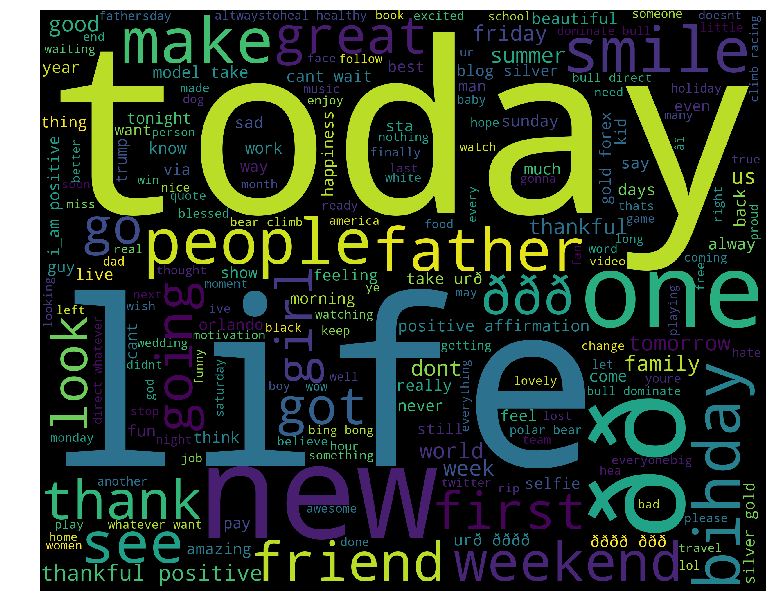

In [76]:
all_words = ' '.join(text for text in df['tweet'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2500,
                      height=2000
                     ).generate(all_words)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

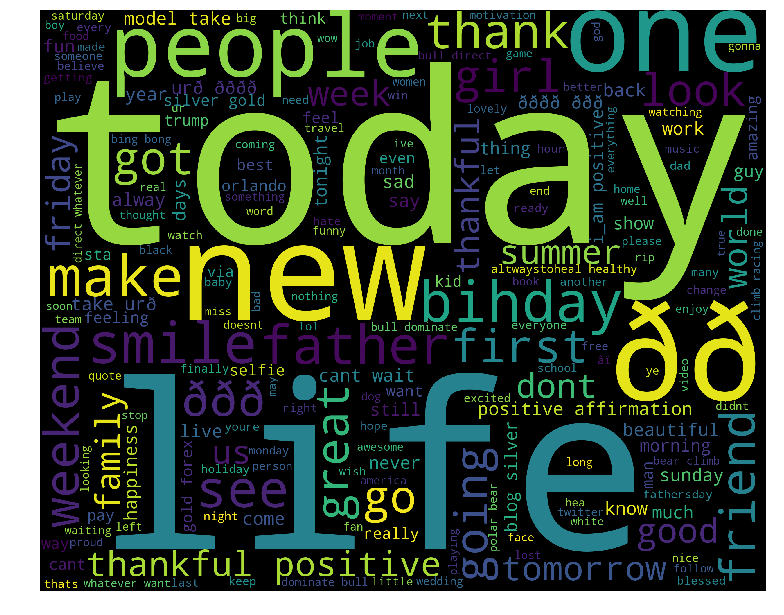

In [77]:
all_words = ' '.join(text for text in df['tweet'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2500,
                      height=2000
                     ).generate(all_words)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

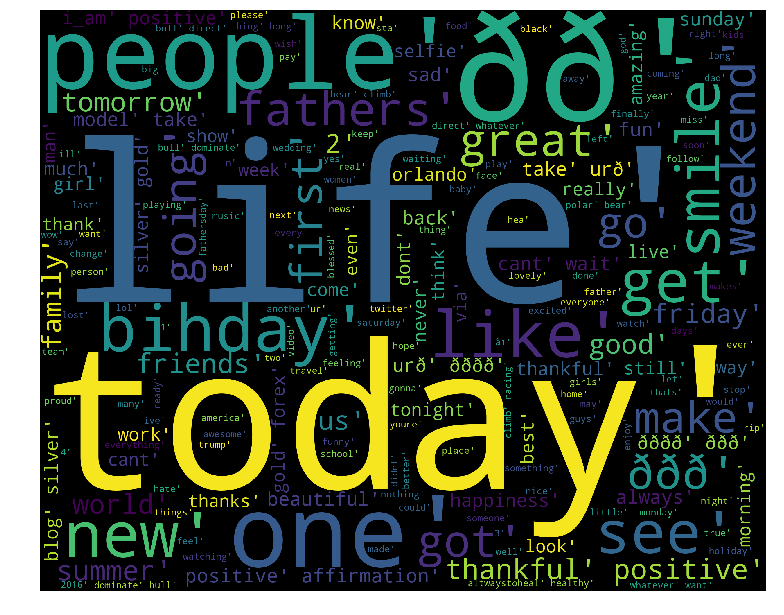

In [78]:
all_words = ' '.join(text for text in df['tokenized_tweet'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2500,
                      height=2000
                     ).generate(all_words)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

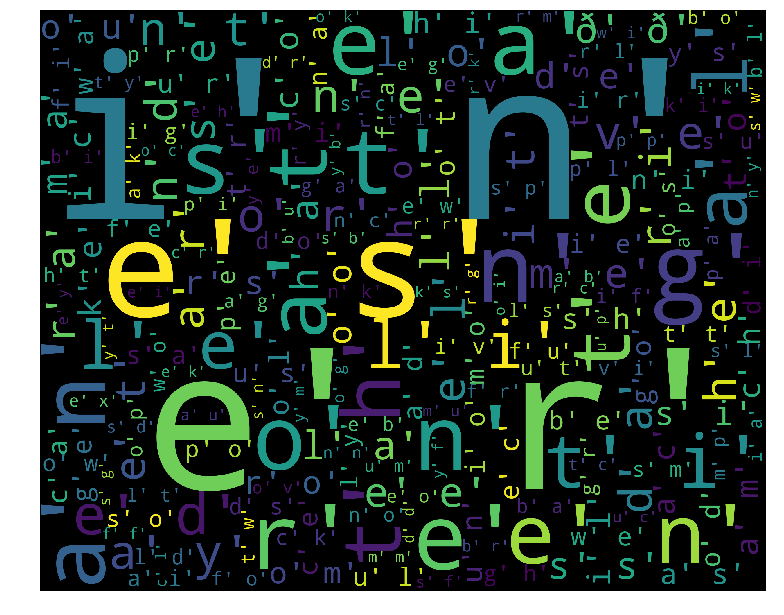

In [79]:
all_words = ' '.join(text for text in df['stemmed_text'].astype(str))
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2500,
                      height=2000
                     ).generate(all_words)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

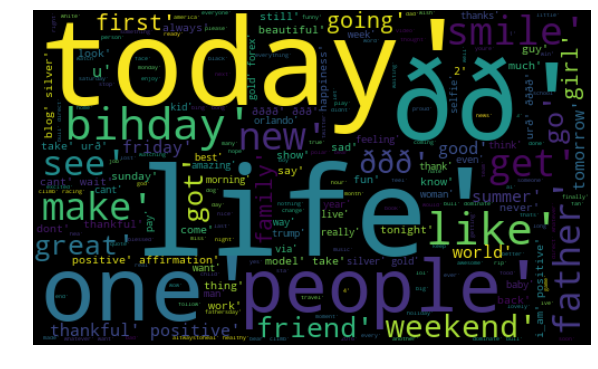

In [80]:
all_words = ' '.join(text for text in df['Lemmatized_word'].astype(str))
from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Manual Way of Count Vectorization

In [81]:
df.shape

(31962, 13)

In [82]:
df.head(1)

,id,label,tweet,Word_Count,char_count,Avg_word_length,stop_word_count,HashTags,numerics,upperword,tokenized_tweet,stemmed_text,Lemmatized_word
0,1,0,father dysfunctional selfish drags kids dysfunction run,21,102,4.555556,10,1,0,0,"[father, dysfunctional, selfish, drags, kids, dysfunction, run]","[f, a, t, h, e, r, , d, y, s, f, u, n, c, t, i, o, n, a, l, , s, e, l, f, i, s, h, , d, r, a, g, s, , k, i, d, s, , d, y, s, f, u, n, c, t, i, o, n, , r, u, n]","[father, dysfunctional, selfish, drag, kid, dysfunction, run]"


In [83]:
len(df['Lemmatized_word'])

31962

In [84]:
df1=df[['id','label','tweet','Lemmatized_word']]

In [85]:
df1['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [86]:
df1.head()

,id,label,tweet,Lemmatized_word
0,1,0,father dysfunctional selfish drags kids dysfunction run,"[father, dysfunctional, selfish, drag, kid, dysfunction, run]"
1,2,0,thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked,"[thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]"
2,3,0,bihday majesty,"[bihday, majesty]"
3,4,0,model take urð ðððð ððð,"[model, take, urð, ðððð, ððð]"
4,5,0,factsguide society motivation,"[factsguide, society, motivation]"


In [87]:
df1.values

array([[1, 0, 'father dysfunctional selfish drags kids dysfunction run',
        list(['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run'])],
       [2, 0,
        'thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked',
        list(['thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'van', 'pdx', 'disapointed', 'getthanked'])],
       [3, 0, 'bihday majesty', list(['bihday', 'majesty'])],
       ...,
       [31960, 0, 'listening sad songs monday morning otw work sad',
        list(['listening', 'sad', 'song', 'monday', 'morning', 'otw', 'work', 'sad'])],
       [31961, 1, 'sikh temple vandalised calgary wso condemns act',
        list(['sikh', 'temple', 'vandalised', 'calgary', 'wso', 'condemns', 'act'])],
       [31962, 0, 'thank follow', list(['thank', 'follow'])]],
      dtype=object)

In [88]:
words_lem=[]
for i in df['Lemmatized_word'].astype(str):
    WNlemma = nltk.WordNetLemmatizer()
    words_lem.append(WNlemma.lemmatize(i))

In [90]:
x=[]
for j in words_lem:
    for i in df1.tweet:
        if j in i:
            x.append(1)
        else:
            x.append(0)

In [91]:
import numpy as np
x=np.array(x)

In [92]:
len(x)

1021569444

Count Vectorization - In Python Library

In [94]:
y=df['label']
x=df['tweet']

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25569,) (6393,) (25569,) (6393,)


In [97]:
X_train.head(2)

22711    cant wait till green leaf comes gonna nail bitter sure
2688                                    model take urð ðððð ððð
Name: tweet, dtype: object

Bag of Words - Count Vectorization

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

In [99]:
X_train_vectorized

<25569x38895 sparse matrix of type '<class 'numpy.int64'>'
	with 189033 stored elements in Compressed Sparse Row format>

Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
model.predict(X_test_vectorized)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(model.predict(X_test_vectorized),y_test))
print(accuracy_score(model.predict(X_test_vectorized),y_test))

[[5936  229]
 [  25  203]]
0.9602690442671672


In [102]:
# kNN Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_vectorized, y_train)
model.predict(X_test_vectorized)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(model.predict(X_test_vectorized),y_test))
print(accuracy_score(model.predict(X_test_vectorized),y_test))

[[5954  360]
 [   7   72]]
0.9425934615986234


In [103]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train_vectorized, y_train)
model.predict(X_test_vectorized)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(model.predict(X_test_vectorized),y_test))
print(accuracy_score(model.predict(X_test_vectorized),y_test))

[[5961  386]
 [   0   46]]
0.9396214609729392


In [104]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
model.predict(X_test_vectorized)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(model.predict(X_test_vectorized),y_test))
print(accuracy_score(model.predict(X_test_vectorized),y_test))

[[5825  167]
 [ 136  265]]
0.9526044110746129


In [105]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
model.predict(X_test_vectorized)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(model.predict(X_test_vectorized),y_test))
print(accuracy_score(model.predict(X_test_vectorized),y_test))

[[5932  218]
 [  29  214]]
0.9613639918661036


In [106]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(X_train_vectorized, y_train)
model.predict(X_test_vectorized)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(model.predict(X_test_vectorized),y_test))
print(accuracy_score(model.predict(X_test_vectorized),y_test))

[[5869  178]
 [  92  254]]
0.9577663068981699
